# heart disease predection

In [170]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeRegressor as DEC_T_reg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as DEC_T_class
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import train_test_split as tts 
from matplotlib import rcParams 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV 
data=pd.read_csv(r"C:\Users\Lenovo\Desktop\careee\ML\3-heart disease\dataset.csv")

# correlation chart

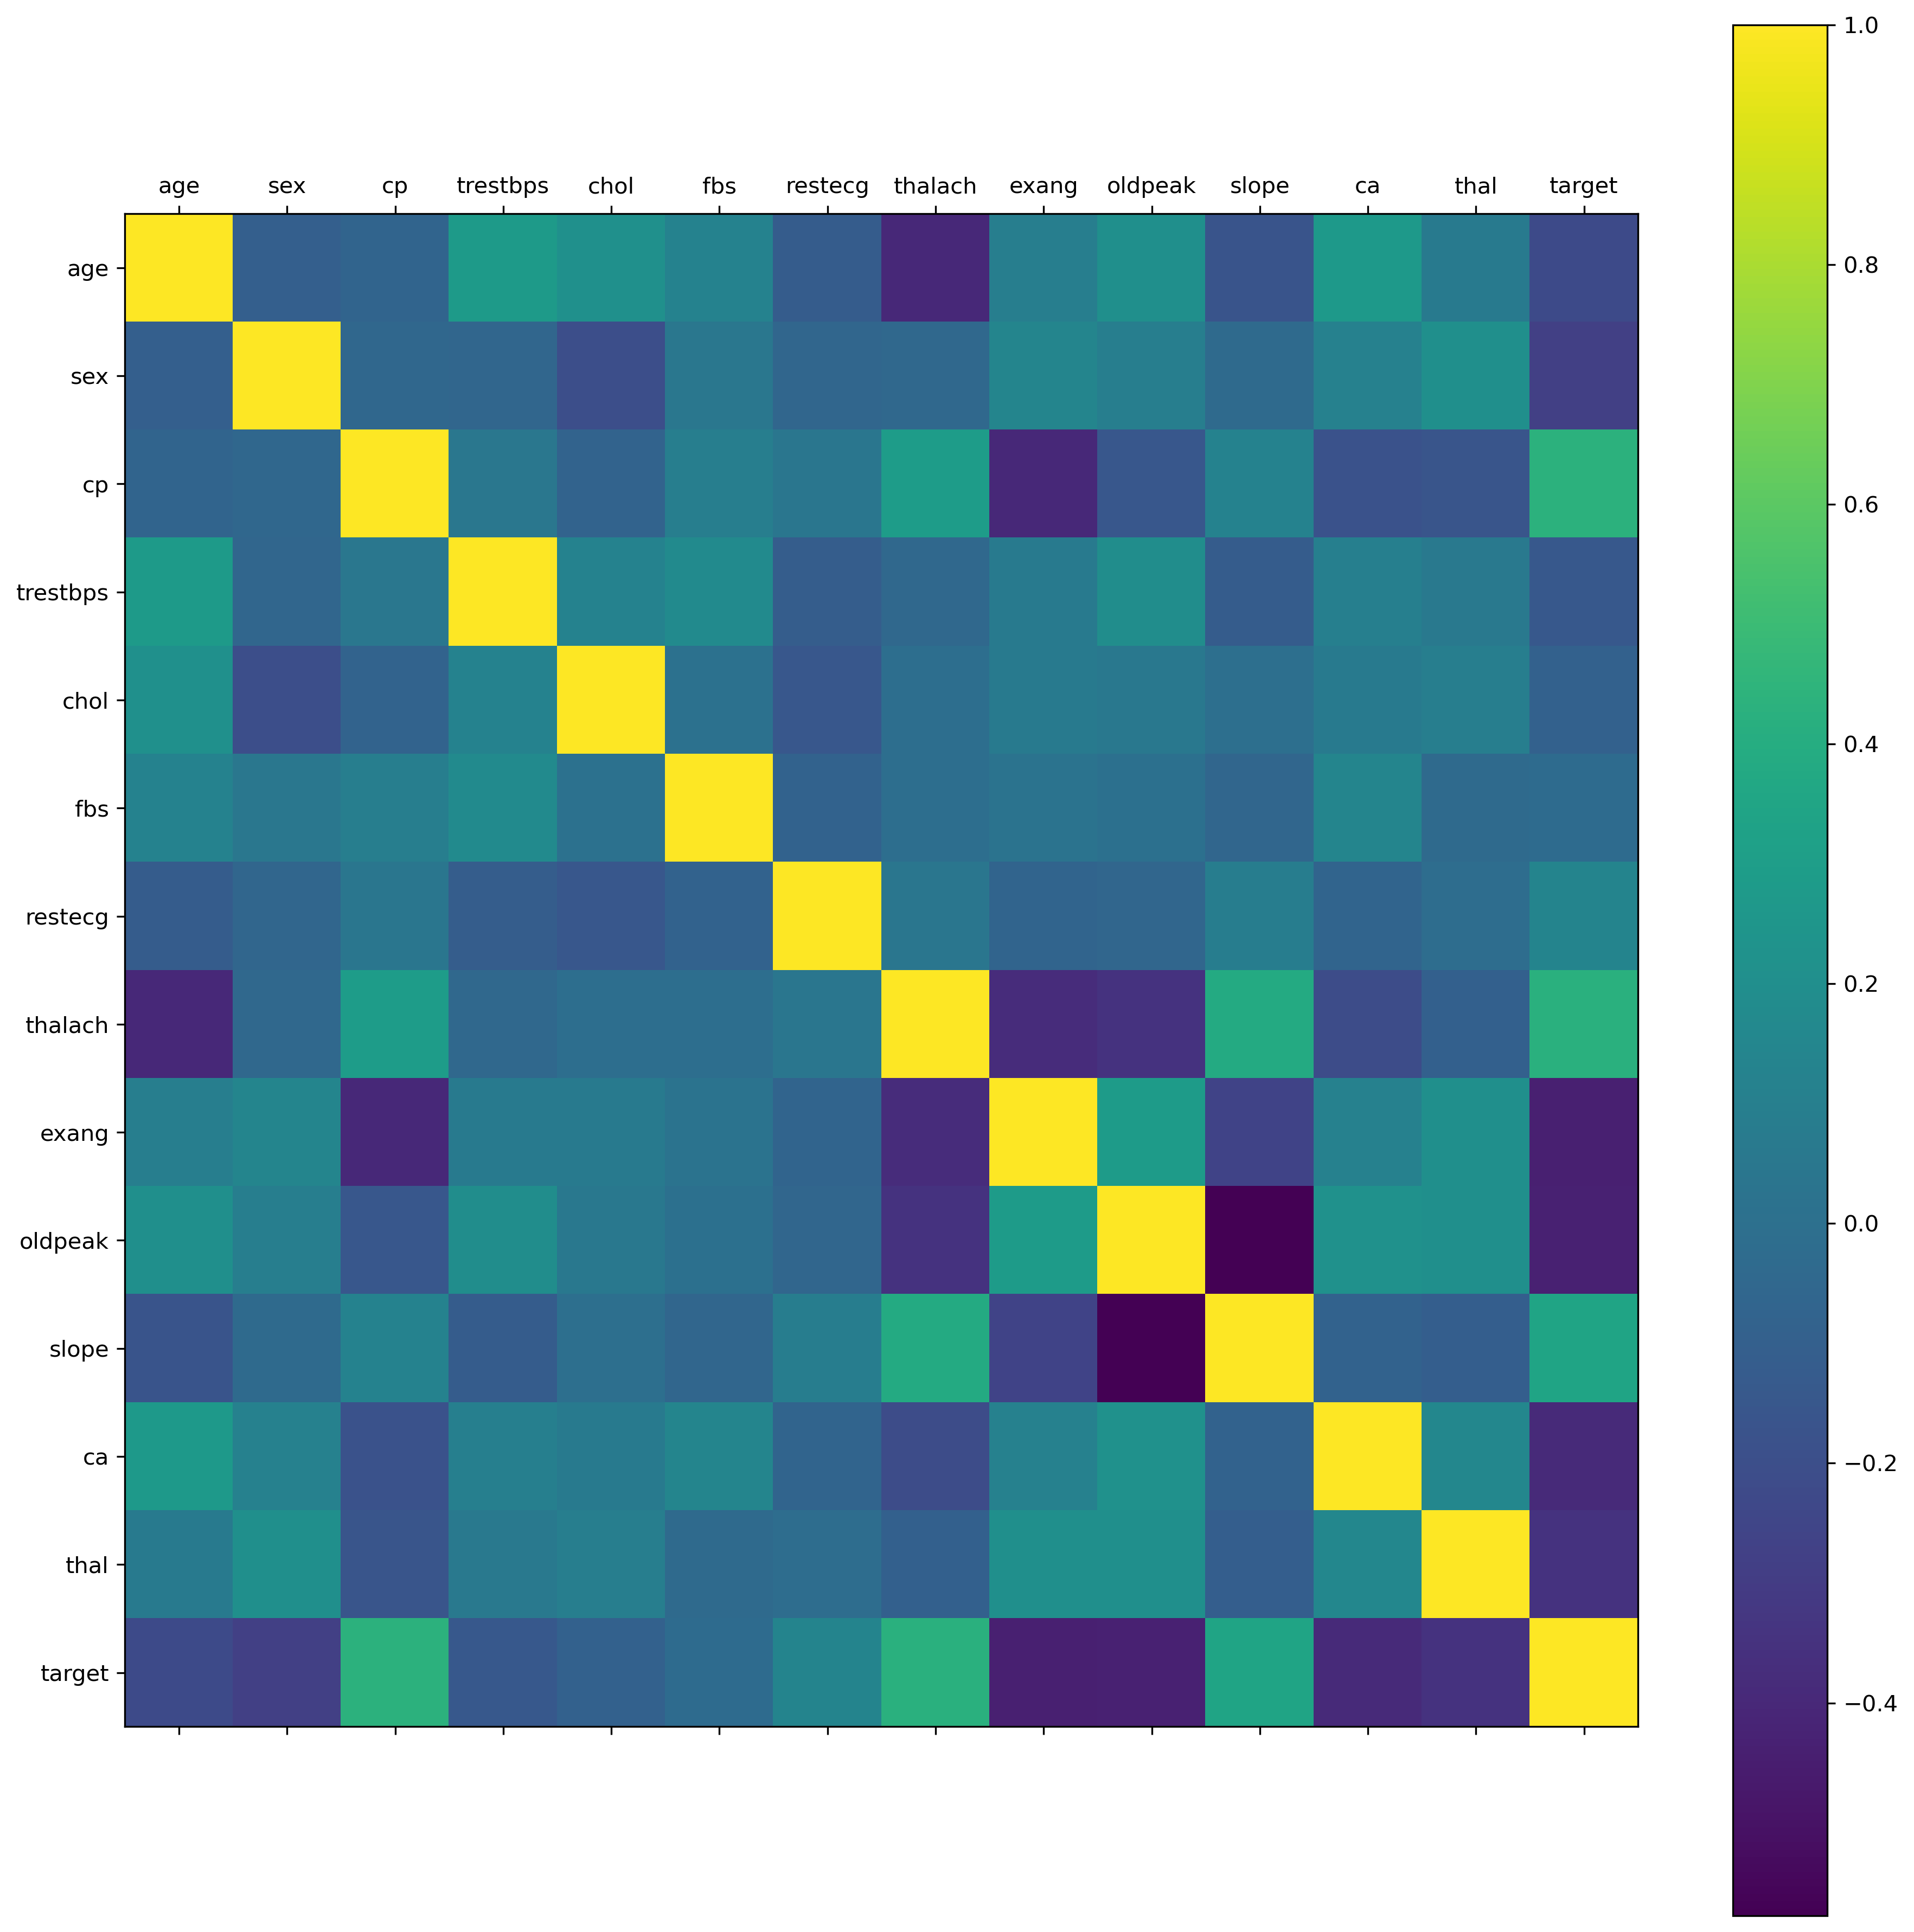

In [171]:
rcParams["figure.dpi"]=300
rcParams["figure.figsize"]=5,15
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]),data.columns)
plt.xticks(np.arange(data.shape[1]),data.columns)
plt.colorbar()



In [172]:
y=data.target
x=data.drop(["target"],axis=1)
t_x,val_x,t_y,val_y=tts(x,y,random_state=0,test_size=0.3)

# cross validation to get best fit :  
    1- hyperparameter :criterion , entropy;max_depth=[list for depth] 
    2- new variable =gridsearchCV(no3 altree : Decission tree regrosser or classifier , hyperprameter ,scoring: roc_auc)
    3- new var2=newvvar.fit(t_x,y_y)
    4- newvar2.best_estimator.feature_importance_

In [173]:
hyper_par = {"criterion":['entropy','gini'],"max_depth":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
tree_gridsearch=GridSearchCV(DEC_T_class(),hyper_par,scoring="roc_auc",n_jobs=-1)
tree=tree_gridsearch.fit(t_x,t_y)
last_model=tree.best_estimator_
print(f"the best fit is : {tree.best_params_}")

the best fit is : {'criterion': 'entropy', 'max_depth': 3}


F:\New folder\New folder\anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.68211289 0.80895309 0.83983282 0.82944211 0.79677144
 0.78141686 0.73919877 0.74716501 0.74749555 0.74420608 0.75399822
 0.75381706 0.76555111 0.7772057  0.77552441 0.76591342 0.76342804
 0.77099542 0.75027333 0.73374968        nan 0.68211289 0.81674241
 0.82820737 0.83017999 0.75104829 0.75476417 0.73609416 0.70730835
 0.74691393 0.74362128 0.76028795 0.72812421 0.75703661 0.73580282
 0.75136982 0.73470633 0.76339626 0.72735825 0.73273265 0.72688469]
  warnings.warn(


In [174]:
for i in list(range(len(last_model.feature_importances_))):
    print(t_x.columns[i]," : ",last_model.feature_importances_[i]*100 ,'%')
n=list(t_x.columns)
y=list(last_model.feature_importances_)


age  :  6.523439543614698 %
sex  :  11.868648271180167 %
cp  :  36.483264047479445 %
trestbps  :  0.0 %
chol  :  0.0 %
fbs  :  0.0 %
restecg  :  0.0 %
thalach  :  9.354510973644453 %
exang  :  0.0 %
oldpeak  :  0.0 %
slope  :  0.0 %
ca  :  25.197016514527064 %
thal  :  10.57312064955417 %


<ipython-input-175-0368ad5a6833>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(x=y, autopct="%.1f%%", explode=[0.05]*len(y), labels=labels, pctdistance=0.5)


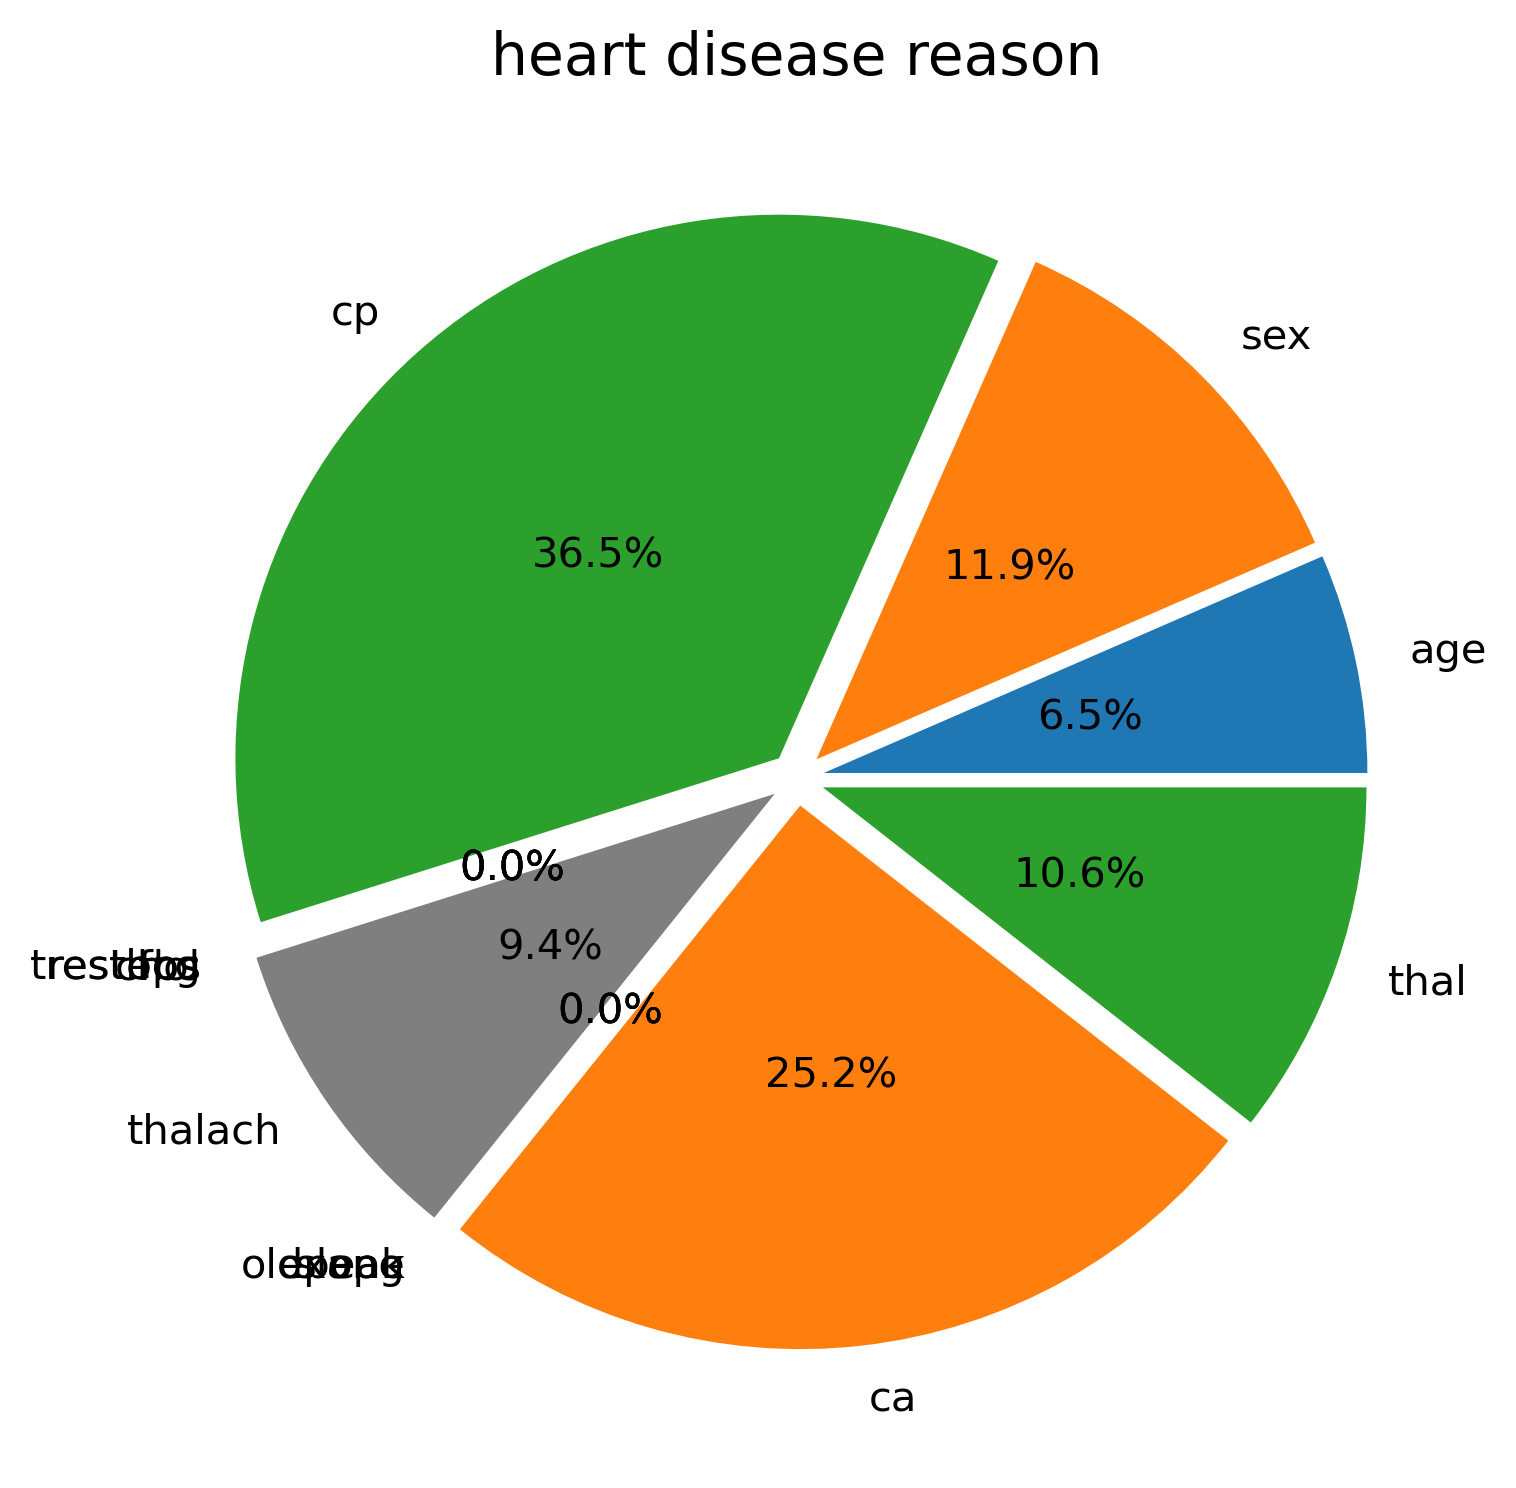

In [175]:
pie, ax = plt.subplots(figsize=[6,6])
labels = t_x.keys()
plt.pie(x=y, autopct="%.1f%%", explode=[0.05]*len(y), labels=labels, pctdistance=0.5)
plt.title("heart disease reason", fontsize=14);
pie.savefig("heart disease reason.png")

# draw the classifier tree 

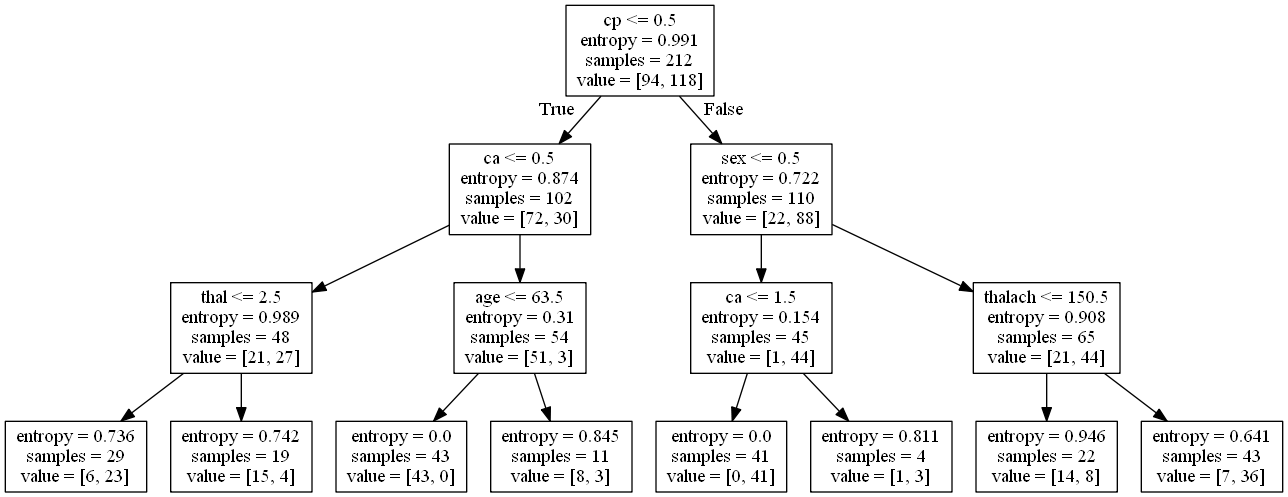

In [176]:
from IPython.display import Image as i
import pydotplus as pd
from sklearn import tree
data=tree.export_graphviz(last_model,feature_names=t_x.columns)
graph=pd.graph_from_dot_data(data)
i(graph.create_png())


In [177]:
from sklearn.metrics import confusion_matrix,classification_report as cr
mat=confusion_matrix(t_y,last_model.predict(t_x))
print(mat)
print(cr(t_y,last_model.predict(t_x),target_names=["no_heart dise","with heart dis"]))

[[ 80  14]
 [ 15 103]]
                precision    recall  f1-score   support

 no_heart dise       0.84      0.85      0.85        94
with heart dis       0.88      0.87      0.88       118

      accuracy                           0.86       212
     macro avg       0.86      0.86      0.86       212
  weighted avg       0.86      0.86      0.86       212

